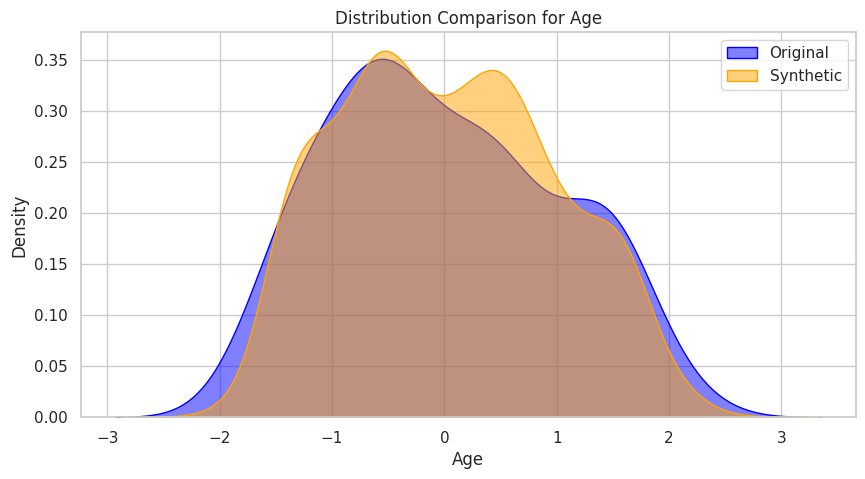

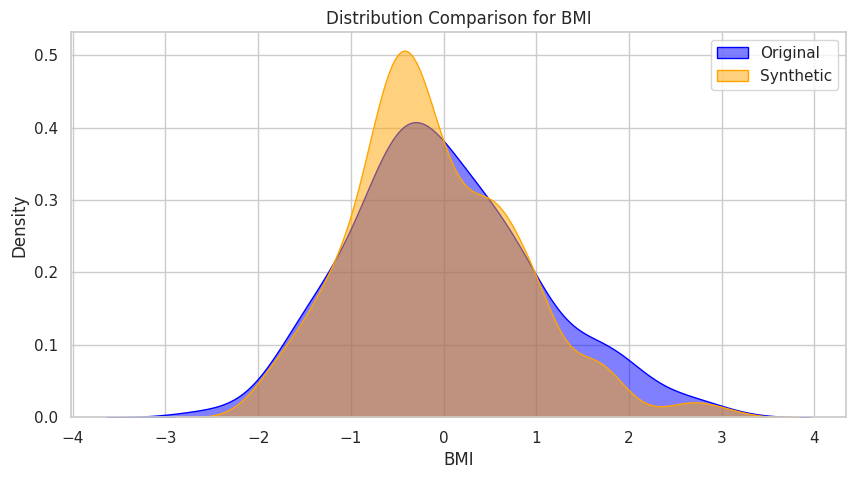

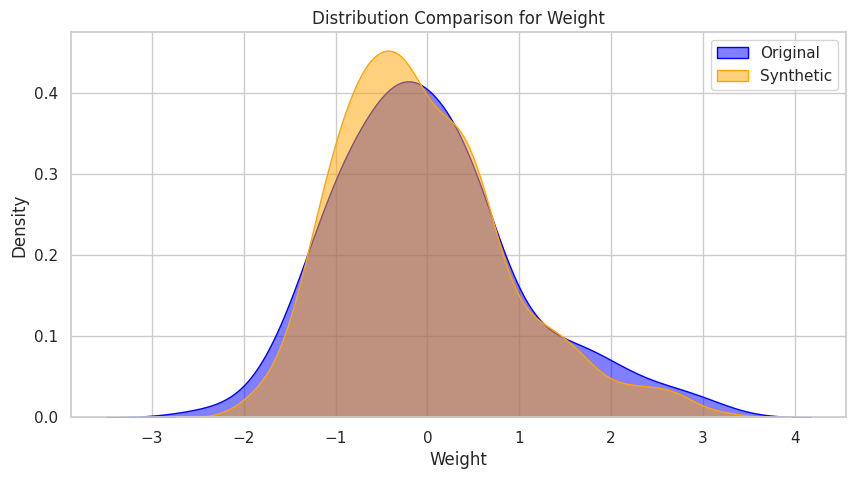

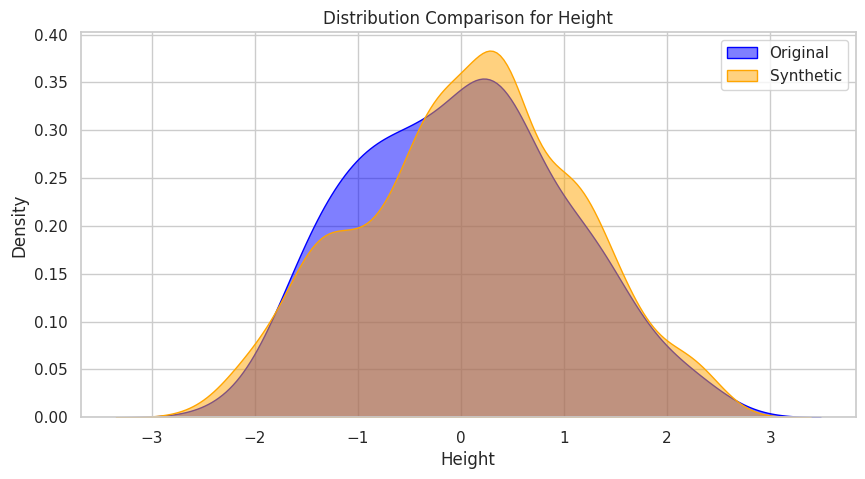

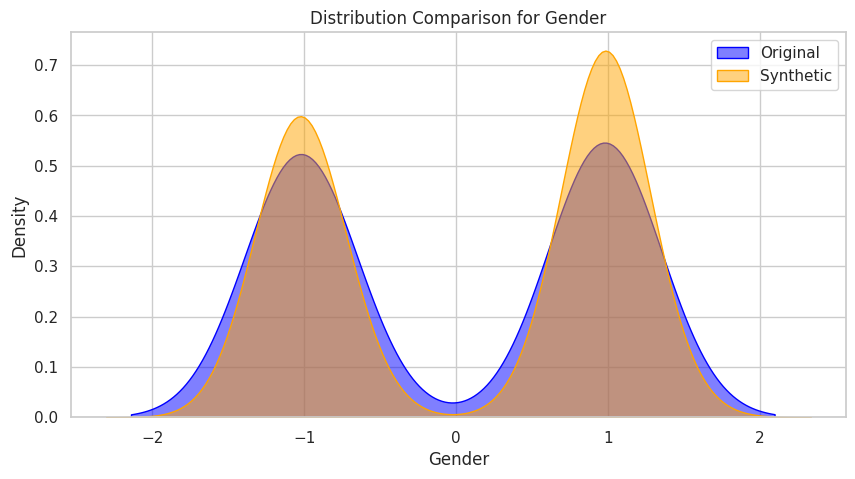

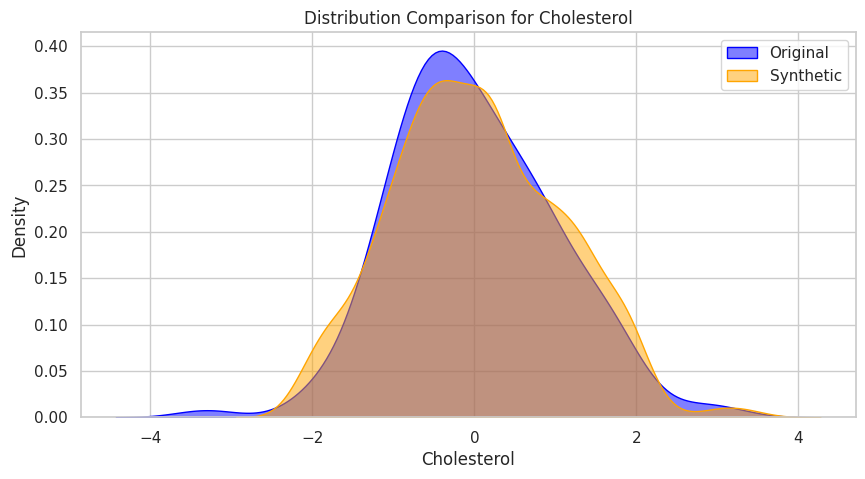

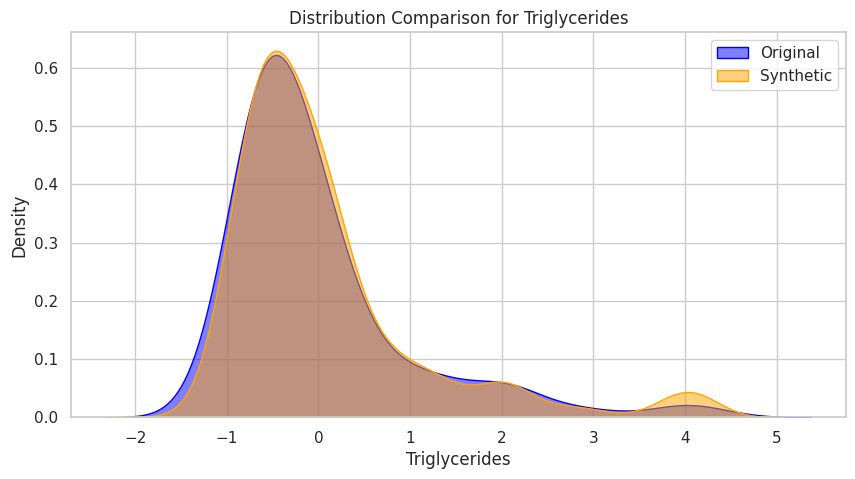

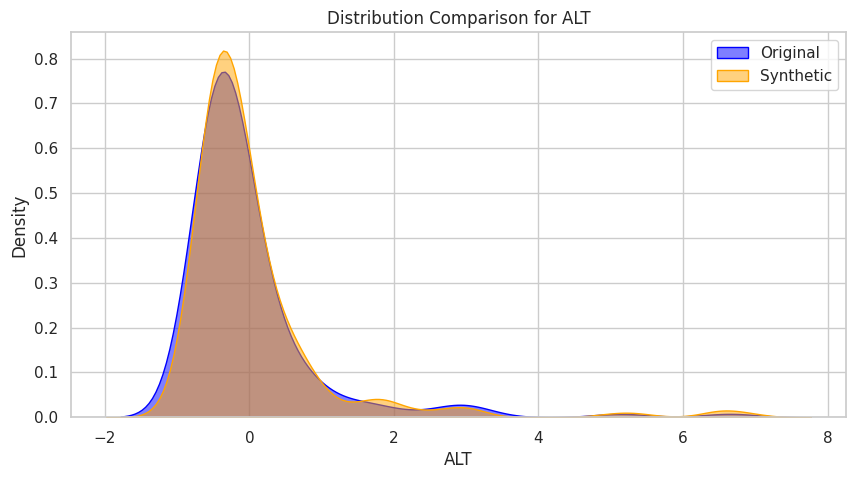

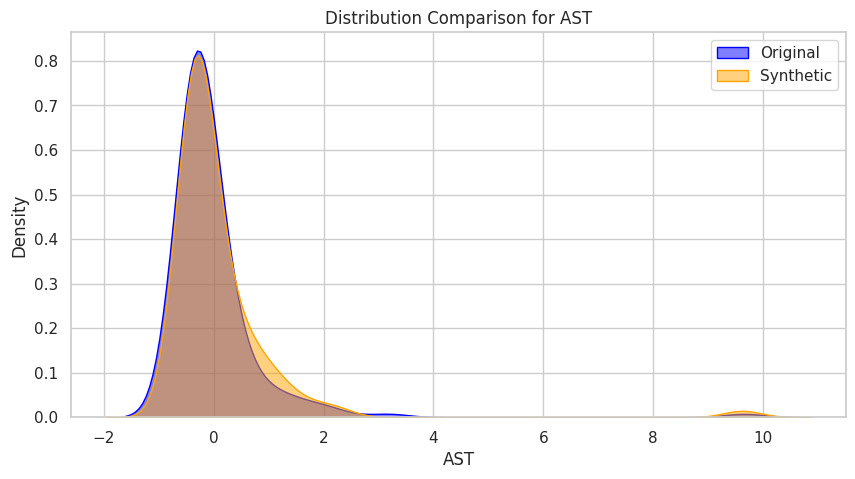

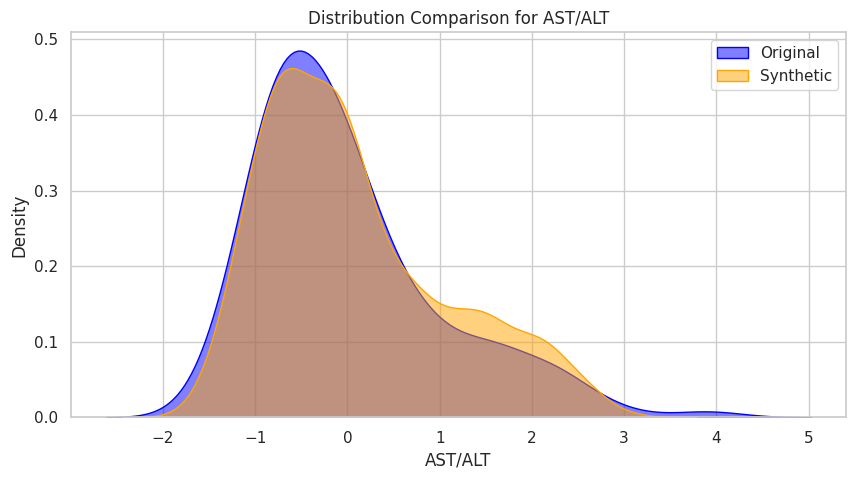

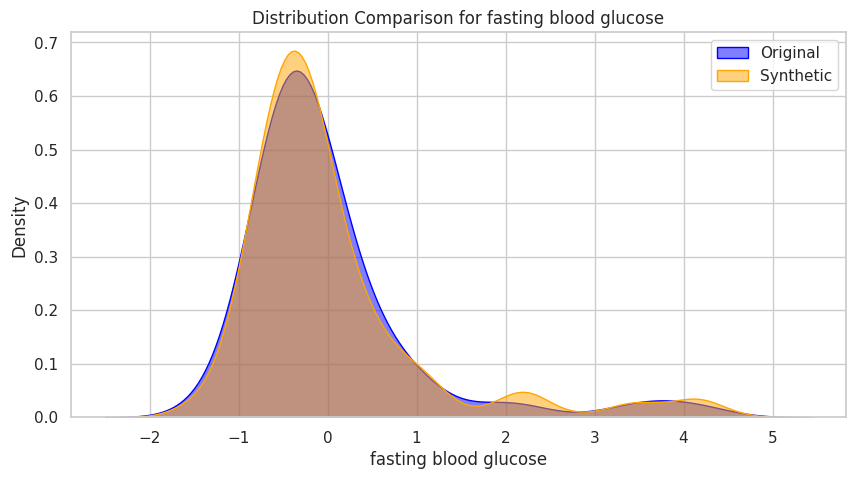

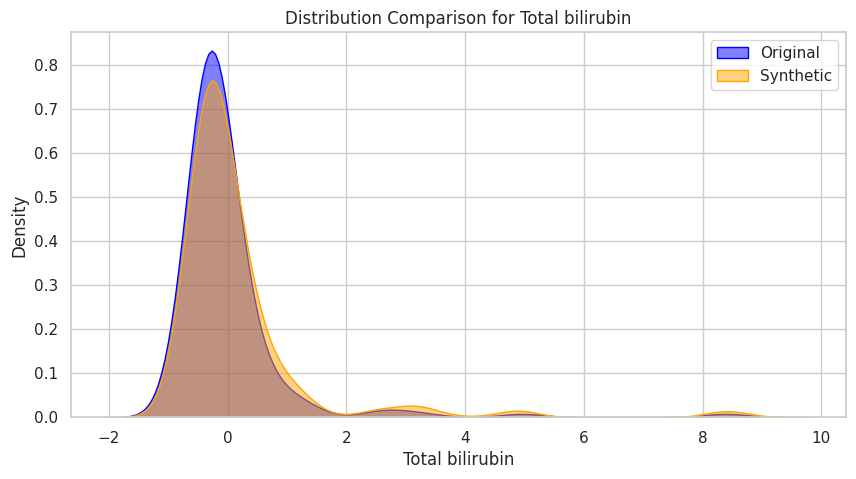

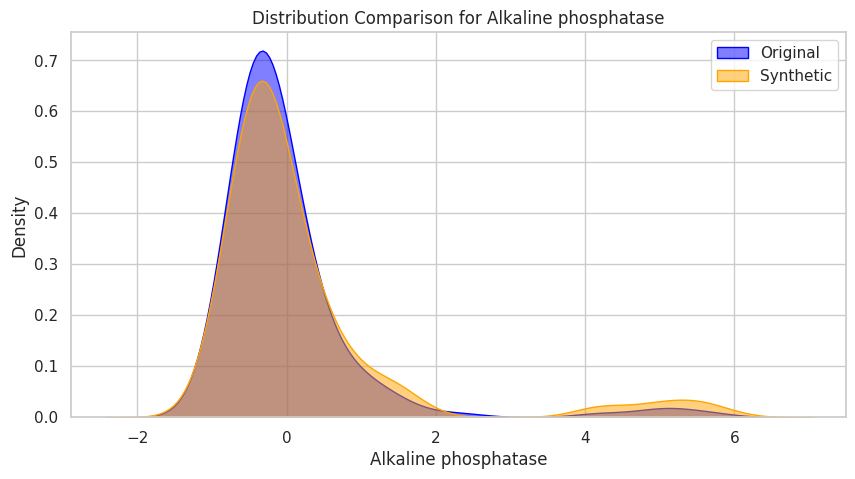

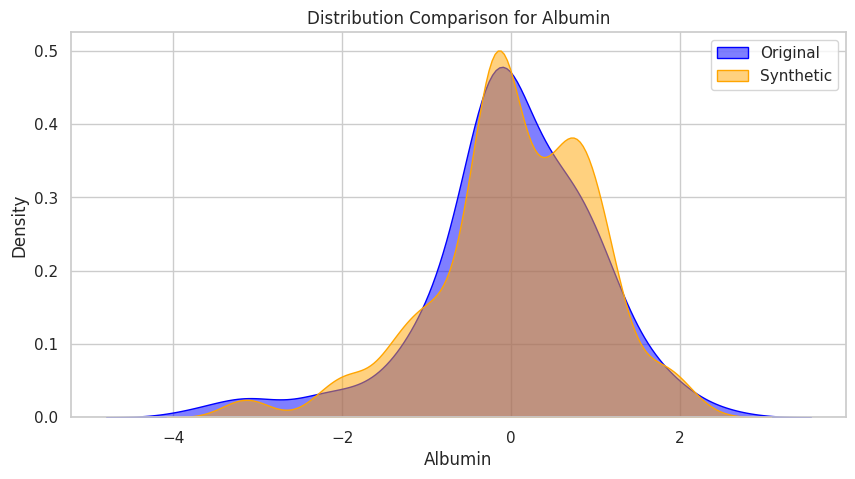

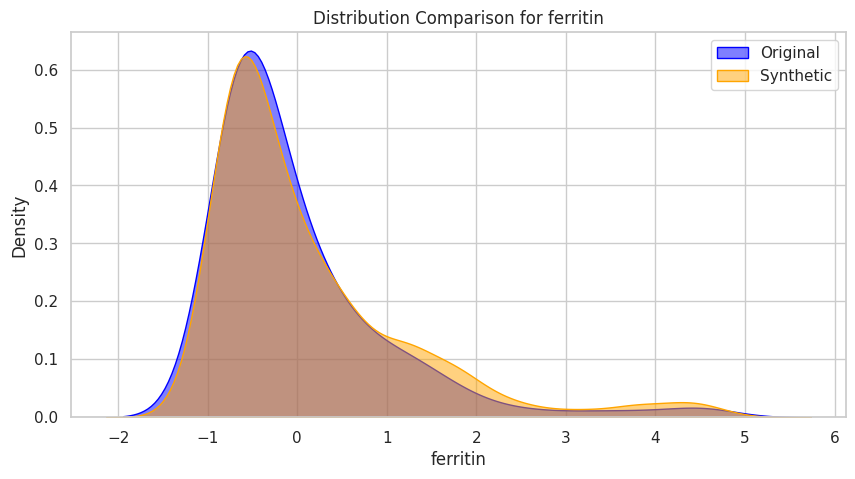

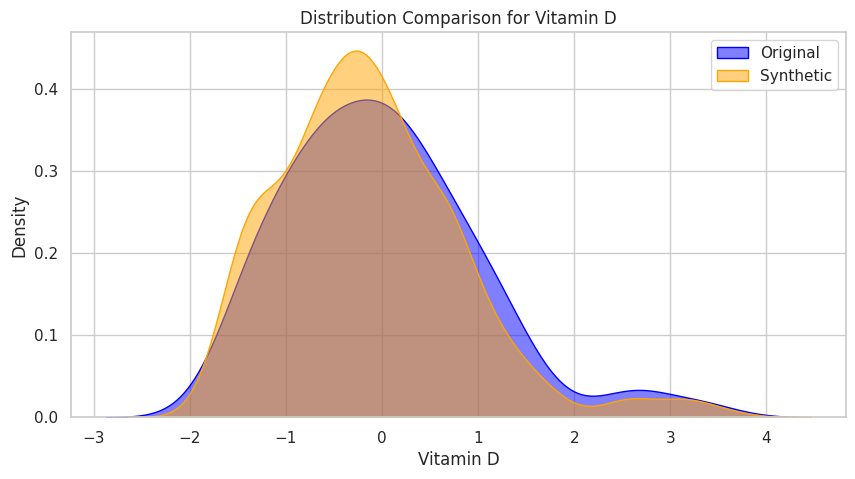

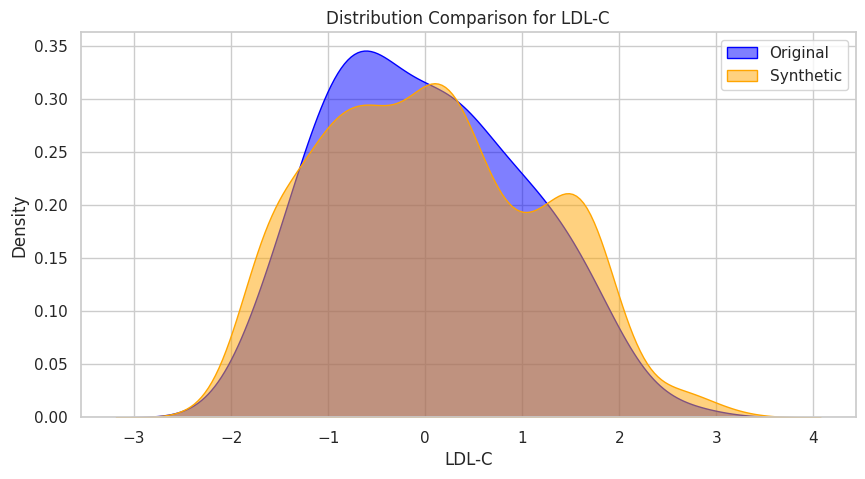

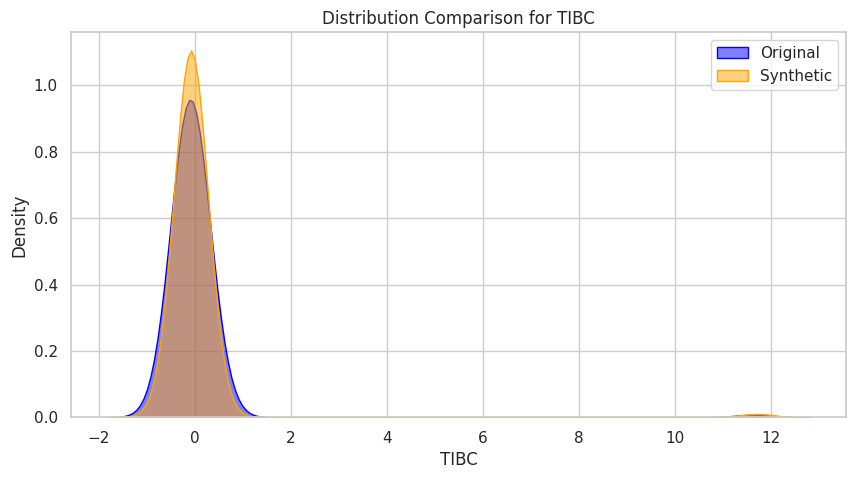

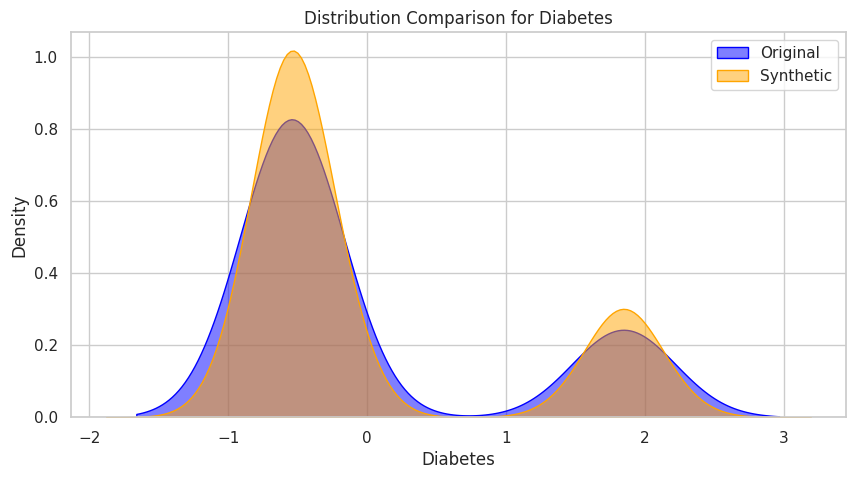

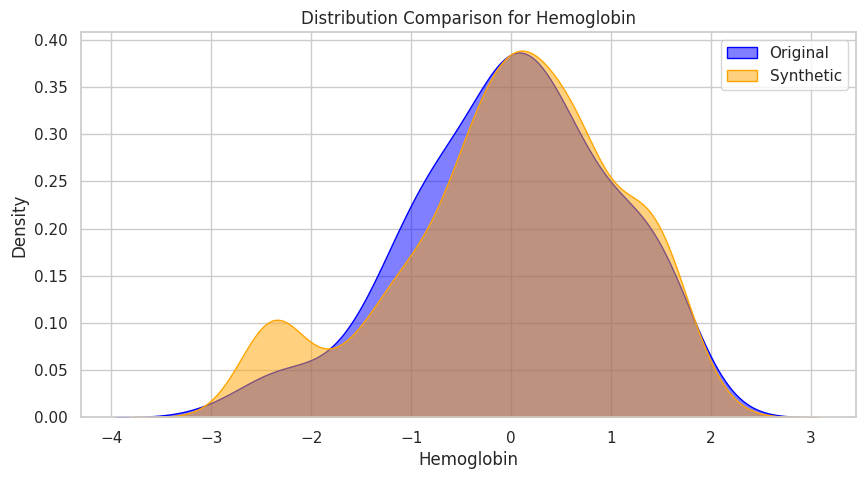

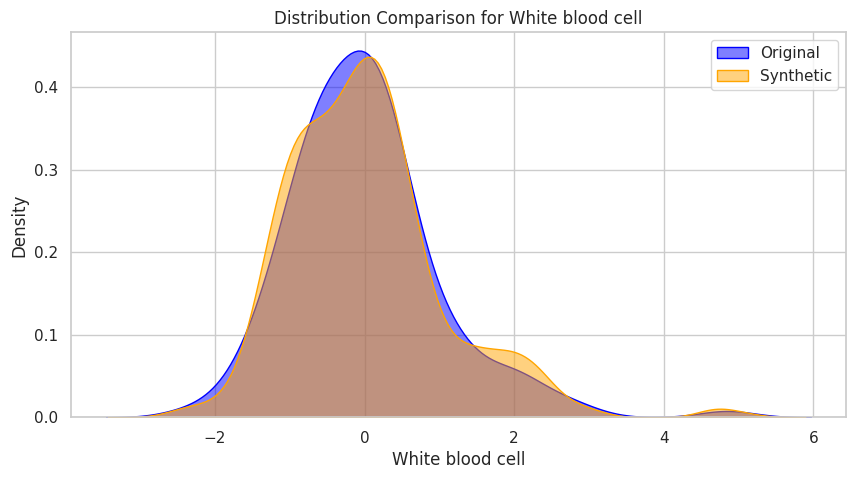

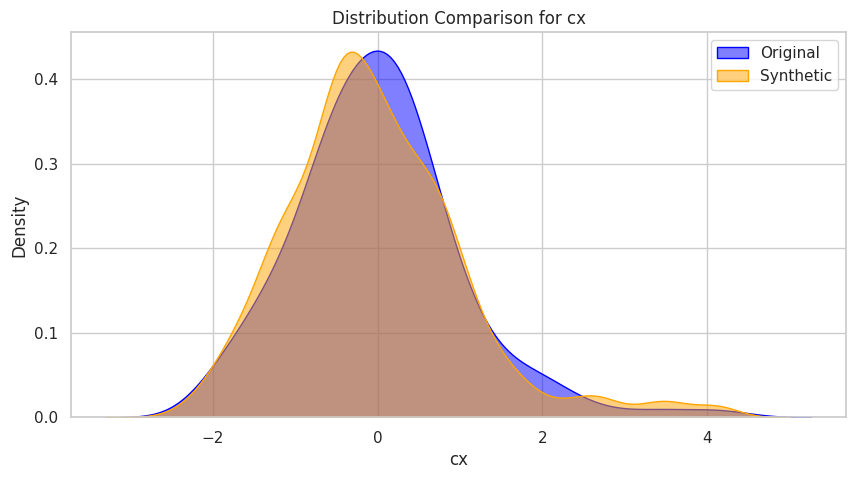

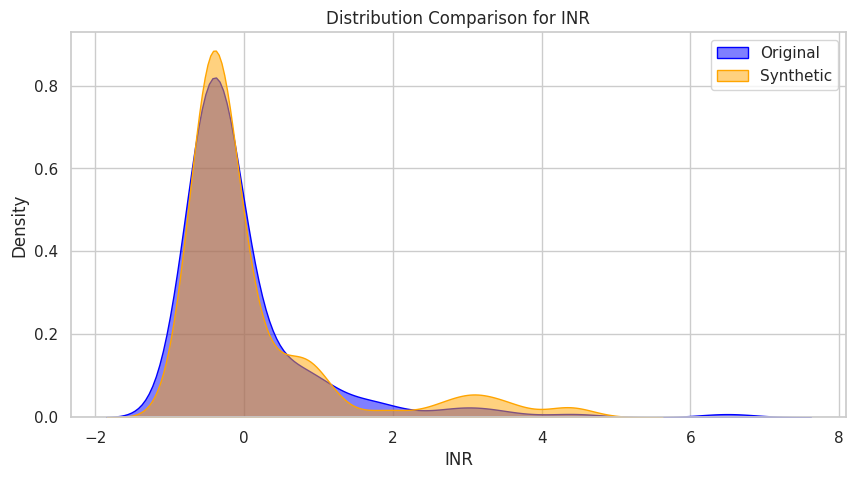

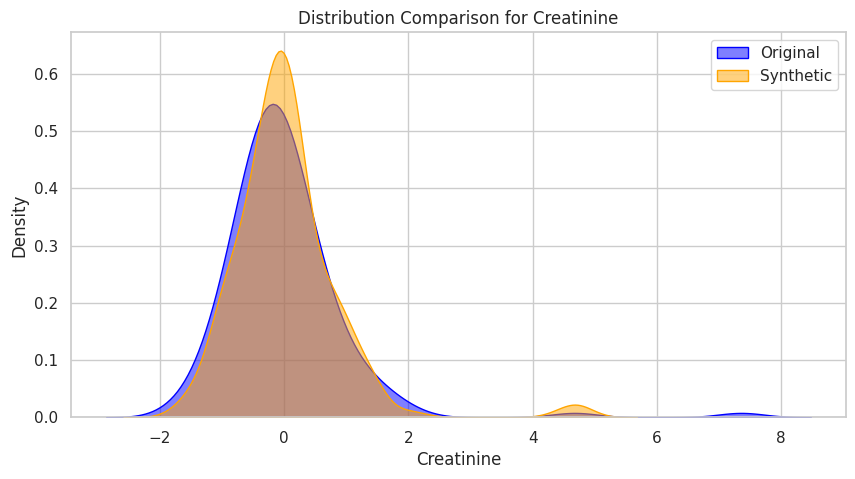

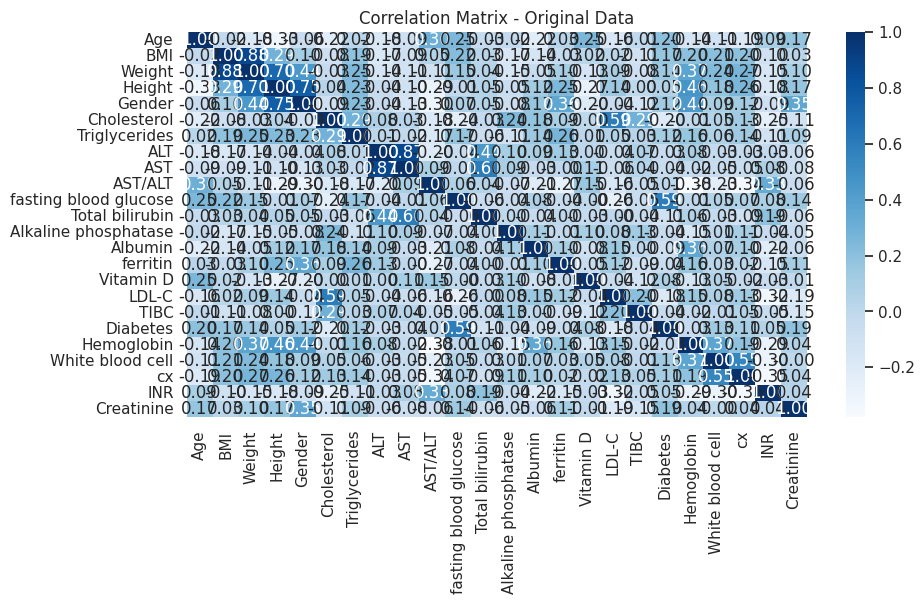

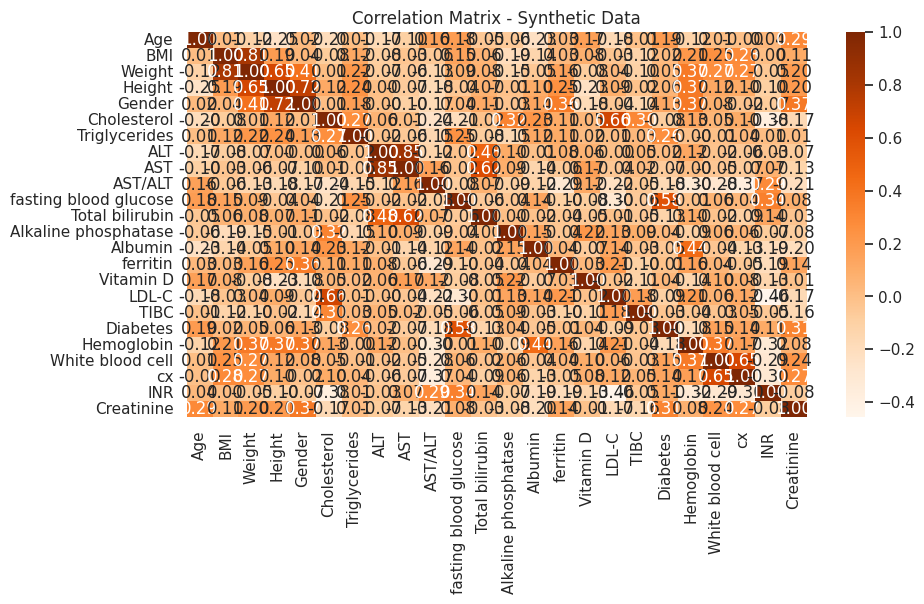

Original Data Summary:
                Age           BMI        Weight        Height        Gender  \
count  1.410000e+02  1.410000e+02  1.410000e+02  1.410000e+02  1.410000e+02   
mean  -1.574784e-16 -3.023586e-16 -5.039310e-17  4.157431e-16  2.771621e-16   
std    1.003565e+00  1.003565e+00  1.003565e+00  1.003565e+00  1.003565e+00   
min   -1.806315e+00 -2.520365e+00 -2.377797e+00 -2.185798e+00 -1.021508e+00   
25%   -7.649027e-01 -6.707965e-01 -6.877184e-01 -8.676905e-01 -1.021508e+00   
50%   -1.140199e-01 -1.390456e-01 -1.444786e-01  9.093328e-02  9.789450e-01   
75%    7.321278e-01  6.007818e-01  4.591210e-01  5.702452e-01  9.789450e-01   
max    2.229158e+00  2.843384e+00  3.054600e+00  2.367665e+00  9.789450e-01   

        Cholesterol  Triglycerides           ALT         AST       AST/ALT  \
count  1.410000e+02   1.410000e+02  1.410000e+02  141.000000  1.410000e+02   
mean  -2.519655e-17   1.511793e-16  2.519655e-17    0.000000  1.133845e-16   
std    1.003565e+00   1.003565e

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load original and synthetic datasets
original_data = pd.read_excel("/content/data_REAL_all.xlsx")
synthetic_data = pd.read_excel("/content/augmented_train_data_noise_all.xlsx")

# Exclude the target column
target_label = 'steato score'
original_features = original_data.drop(columns=[target_label], errors='ignore')
synthetic_features = synthetic_data.drop(columns=[target_label], errors='ignore')

# Check distribution of numerical columns
numerical_columns = original_features.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(original_features[col], label='Original', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(synthetic_features[col], label='Synthetic', color='orange', fill=True, alpha=0.5)
    plt.title(f"Distribution Comparison for {col}")
    plt.legend()
    plt.show()

# Check distribution of categorical columns
categorical_columns = original_features.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    original_counts = original_features[col].value_counts(normalize=True)
    synthetic_counts = synthetic_features[col].value_counts(normalize=True)

    df_comparison = pd.DataFrame({
        'Original': original_counts,
        'Synthetic': synthetic_counts
    }).fillna(0)

    df_comparison.plot(kind='bar', figsize=(10, 5), width=0.8)
    plt.title(f"Category Comparison for {col}")
    plt.ylabel('Proportion')
    plt.show()

# Correlation comparison
plt.figure(figsize=(10, 5))
sns.heatmap(original_features.corr(), annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Correlation Matrix - Original Data')
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(synthetic_features.corr(), annot=True, cmap='Oranges', fmt='.2f', cbar=True)
plt.title('Correlation Matrix - Synthetic Data')
plt.show()

# Summary statistics
original_summary = original_features.describe()
synthetic_summary = synthetic_features.describe()

print("Original Data Summary:")
print(original_summary)

print("\nSynthetic Data Summary:")
print(synthetic_summary)
